In [1]:
import pandas as pd
import numpy as np

In [3]:
LINK = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

In [4]:
quakes = pd.read_csv(LINK, parse_dates=['time', 'updated'])
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             9143 non-null   datetime64[ns, UTC]
 1   latitude         9143 non-null   float64            
 2   longitude        9143 non-null   float64            
 3   depth            9143 non-null   float64            
 4   mag              9138 non-null   float64            
 5   magType          9138 non-null   object             
 6   nst              6437 non-null   float64            
 7   gap              7699 non-null   float64            
 8   dmin             6506 non-null   float64            
 9   rms              9142 non-null   float64            
 10  net              9143 non-null   object             
 11  id               9143 non-null   object             
 12  updated          9143 non-null   datetime64[ns, UTC]
 13  place            9

In [5]:
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-22 01:43:42.340000+00:00,19.153166,-155.462662,32.020000,2.07,md,34.0,165.0,NaN,0.15,...,2021-12-22 01:46:53.330000+00:00,"5 km SSE of Pāhala, Hawaii",earthquake,0.63,0.92,1.01,7.0,automatic,hv,hv
1,2021-12-22 01:35:23.020000+00:00,19.171167,-155.465164,30.830000,2.59,ml,39.0,165.0,NaN,0.11,...,2021-12-22 01:40:52.790000+00:00,"3 km SSE of Pāhala, Hawaii",earthquake,0.54,0.81,3.36,24.0,automatic,hv,hv
2,2021-12-22 01:32:45.459000+00:00,64.499300,-151.784100,0.000000,1.60,ml,NaN,NaN,NaN,1.14,...,2021-12-22 01:39:04.388000+00:00,"73 km NNE of Lake Minchumina, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2021-12-22 01:27:19.510000+00:00,19.173666,-155.488831,31.690001,1.74,md,23.0,210.0,NaN,0.18,...,2021-12-22 01:30:25.250000+00:00,"3 km SSW of Pāhala, Hawaii",earthquake,1.03,0.85,1.80,4.0,automatic,hv,hv
4,2021-12-22 01:24:45.700000+00:00,38.791000,-122.762497,2.020000,0.45,md,11.0,64.0,0.009854,0.02,...,2021-12-22 01:35:11.686000+00:00,"2km NNW of The Geysers, CA",earthquake,0.31,0.60,0.40,2.0,automatic,nc,nc


In [6]:
quakes.shape

(9143, 22)

In [7]:
quakes['timeframe'] = quakes['time'].apply(lambda x: str(x)[0:10])
quakes['starttime'] = quakes['time'].apply(lambda x: str(x)[0:19])
quakes['updatetime'] = quakes['updated'].apply(lambda x: str(x)[0:19])

quakes.filter(regex="time")

,time,timeframe,starttime,updatetime
0,2021-12-22 01:43:42.340000+00:00,2021-12-22,2021-12-22 01:43:42,2021-12-22 01:46:53
1,2021-12-22 01:35:23.020000+00:00,2021-12-22,2021-12-22 01:35:23,2021-12-22 01:40:52
2,2021-12-22 01:32:45.459000+00:00,2021-12-22,2021-12-22 01:32:45,2021-12-22 01:39:04
3,2021-12-22 01:27:19.510000+00:00,2021-12-22,2021-12-22 01:27:19,2021-12-22 01:30:25
4,2021-12-22 01:24:45.700000+00:00,2021-12-22,2021-12-22 01:24:45,2021-12-22 01:35:11
...,...,...,...,...
9138,2021-11-22 02:06:51.370000+00:00,2021-11-22,2021-11-22 02:06:51,2021-11-30 05:02:12
9139,2021-11-22 02:01:16.437000+00:00,2021-11-22,2021-11-22 02:01:16,2021-12-02 03:51:21
9140,2021-11-22 01:58:43.300000+00:00,2021-11-22,2021-11-22 01:58:43,2021-11-22 02:29:01
9141,2021-11-22 01:53:54.387000+00:00,2021-11-22,2021-11-22 01:53:54,2021-12-02 03:47:12


In [8]:
quakes = quakes.loc[quakes['mag']>0]

In [9]:
quakes.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2701
gap                1439
dmin               2482
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2178
depthError            0
magError           1917
magNst             1443
status                0
locationSource        0
magSource             0
timeframe             0
starttime             0
updatetime            0
dtype: int64

In [10]:
# completed cases only
quakes = quakes.dropna(how="any")
quakes.isna().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
timeframe          0
starttime          0
updatetime         0
dtype: int64

In [11]:
quakes.shape

(3920, 25)

In [12]:
quakes = quakes.sort_values("time").reset_index(drop=True)
quakes.nunique()

time               3920
latitude           3472
longitude          3560
depth              1701
mag                 367
magType               3
nst                  97
gap                 305
dmin               3308
rms                  57
net                   9
id                 3920
updated            3920
place              1995
type                  4
horizontalError     454
depthError          627
magError            609
magNst               79
status                2
locationSource        9
magSource             9
timeframe            31
starttime          3918
updatetime         3905
dtype: int64

In [13]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,36.591433,-114.380907,7.455667,1.316816,20.311990,108.138776,0.097582,0.122702,0.569610,2.647023,0.172599,11.288520
std,6.127498,13.275566,9.291716,0.776038,13.881313,61.073831,0.160487,0.084941,1.252229,6.917775,0.091371,12.165176
min,17.726000,-125.918833,-3.460000,0.010000,2.000000,13.000000,0.000550,0.000000,0.090000,0.100000,0.000000,1.000000
25%,33.815333,-122.126833,2.430000,0.750000,11.000000,63.000000,0.020823,0.060000,0.220000,0.410000,0.110000,4.000000
50%,36.953833,-117.603333,5.985000,1.160000,17.000000,89.000000,0.054065,0.110000,0.330000,0.610000,0.160000,8.000000
75%,38.830875,-115.099000,10.000000,1.800000,25.000000,139.250000,0.099625,0.170000,0.590000,1.230000,0.213000,14.000000
max,49.432333,-63.662300,184.000000,4.440000,174.000000,359.000000,2.190100,0.790000,54.500000,31.610000,0.774000,269.000000


In [14]:
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,timeframe,starttime,updatetime
0,2021-11-22 01:49:47.360000+00:00,33.855500,-116.168500,3.12,0.85,ml,26.0,81.0,0.06989,0.16,...,0.25,0.29,0.118,18.0,reviewed,ci,ci,2021-11-22,2021-11-22 01:49:47,2021-11-22 18:01:29
1,2021-11-22 01:58:43.300000+00:00,18.036000,-68.411500,72.00,2.56,md,13.0,203.0,0.47880,0.23,...,1.65,1.07,0.260,2.0,reviewed,pr,pr,2021-11-22,2021-11-22 01:58:43,2021-11-22 02:29:01
2,2021-11-22 02:06:51.370000+00:00,38.834667,-122.804333,2.09,0.91,md,37.0,31.0,0.01155,0.03,...,0.14,0.22,0.155,8.0,reviewed,nc,nc,2021-11-22,2021-11-22 02:06:51,2021-11-30 05:02:12
3,2021-11-22 02:12:28.180000+00:00,46.048500,-112.193167,6.02,0.05,md,6.0,231.0,0.25600,0.08,...,0.94,5.84,0.205,3.0,reviewed,mb,mb,2021-11-22,2021-11-22 02:12:28,2021-11-22 23:19:29
4,2021-11-22 02:29:26+00:00,44.980667,-113.041667,8.30,1.30,ml,8.0,242.0,0.20500,0.11,...,1.33,3.36,0.117,4.0,reviewed,mb,mb,2021-11-22,2021-11-22 02:29:26,2021-11-22 15:41:19


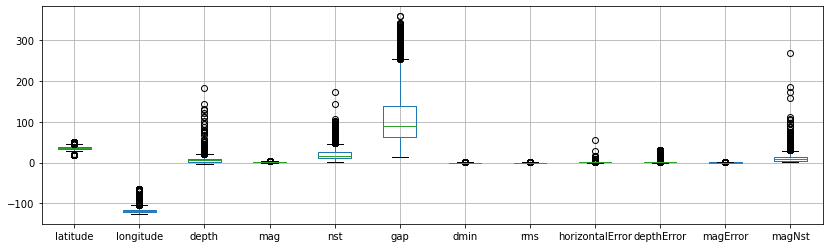

In [15]:
quakes.boxplot(figsize=(14,4));

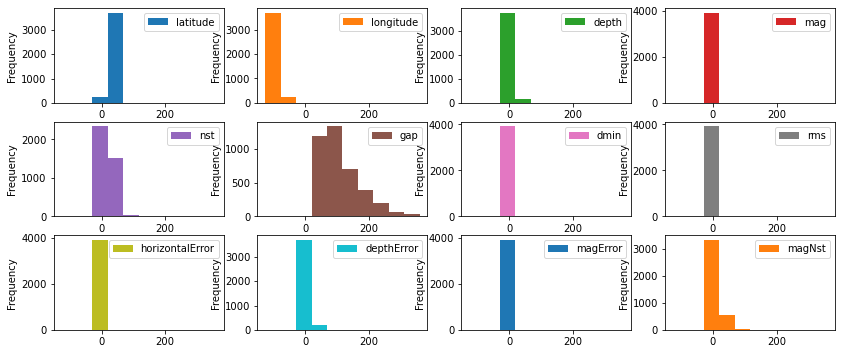

In [16]:
quakes.loc[:, quakes.dtypes==np.float64]\
.plot.hist(subplots=True, layout=(4,4), figsize=(14,8), sharey=False, sharex=False);

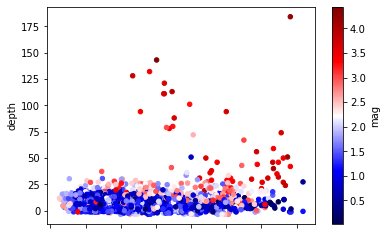

In [17]:
quakes.plot.scatter(x="gap", y="depth", c="mag", cmap="seismic");

In [18]:
q = quakes['type'].value_counts(dropna=False)

type(q)

pandas.core.series.Series

In [19]:
q

earthquake      3768
quarry blast     104
explosion         47
other event        1
Name: type, dtype: int64

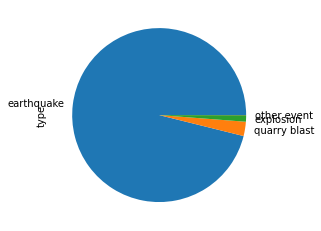

In [20]:
q.plot.pie();

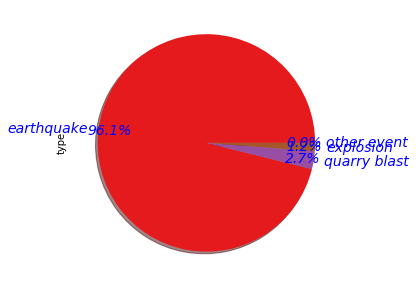

In [21]:
t = dict(color="b", fontsize=14, fontstyle="italic")

q.plot.pie(
    cmap="Set1",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t
);

In [22]:
q = q[q.values<200]
q

quarry blast    104
explosion        47
other event       1
Name: type, dtype: int64

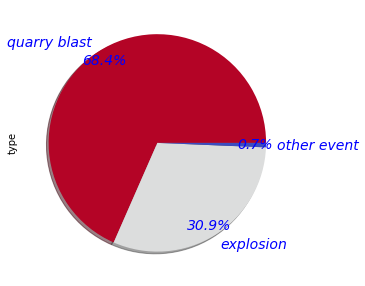

In [23]:
q.plot.pie(
    cmap="coolwarm_r",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t
);

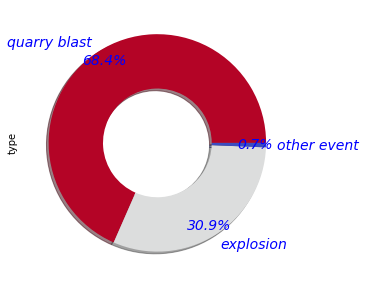

In [24]:
w = dict(width=0.5)

q.plot.pie(
    cmap="coolwarm_r",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t,
    wedgeprops=w
);

In [25]:
q = quakes.pivot_table(index="timeframe", columns="type", values="mag", fill_value=0, aggfunc=np.mean)
q

type,earthquake,explosion,other event,quarry blast
timeframe,,,,
2021-11-22,1.374538,1.066667,0.00,1.316667
2021-11-23,1.385035,1.390000,0.00,1.612500
2021-11-24,1.327156,1.275000,0.00,1.294000
2021-11-25,1.382857,2.130000,0.00,1.560000
2021-11-26,1.313988,0.000000,0.00,0.000000
2021-11-27,1.112474,1.990000,0.00,0.000000
2021-11-28,1.422112,1.670000,0.00,0.000000
2021-11-29,1.275154,1.606667,0.00,1.356667
2021-11-30,1.301375,0.000000,0.00,1.222000


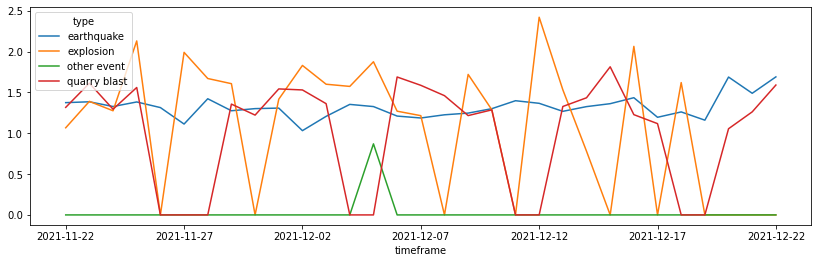

In [26]:
q.plot(figsize=(14,4));

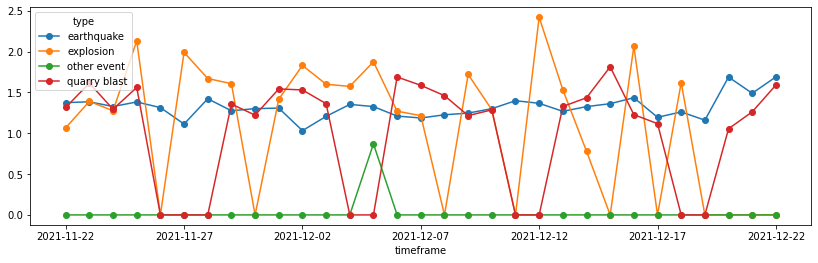

In [27]:
q.plot(marker="o", figsize=(14,4));

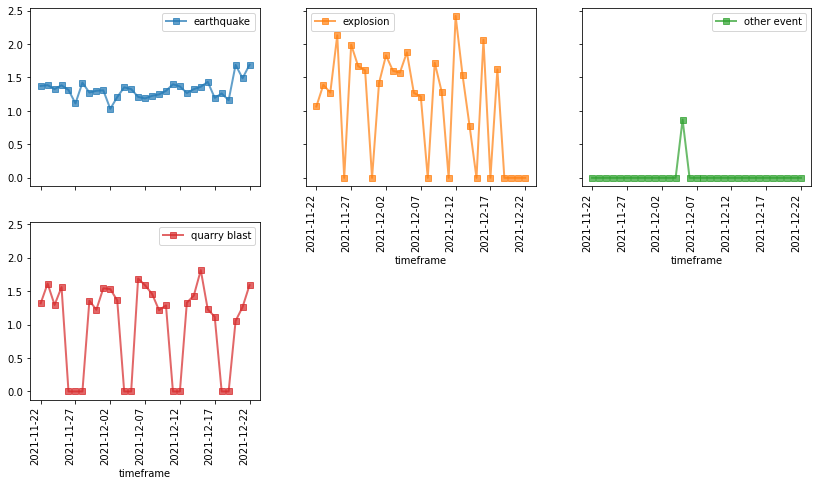

In [28]:
q.plot(
    subplots=True,
    lw=2,
    alpha=0.7,
    layout=(2,3),
    rot=90,
    sharex=True,
    sharey=True,
    marker="s",
    figsize=(14,8)
);

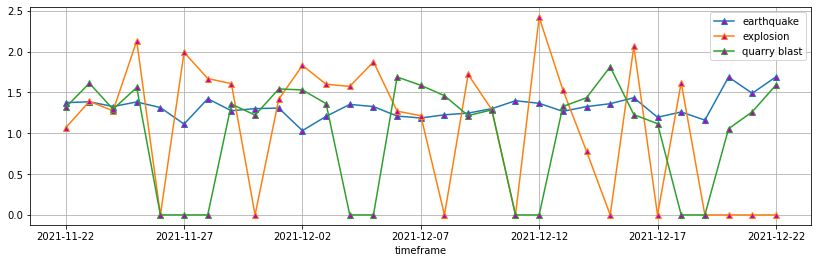

In [29]:
for i, cols in q.iteritems():
    if cols.sum() > 15:
        cols.plot(label=i, legend=True, marker="^", markerfacecolor="m", figsize=(14,4), grid=True)

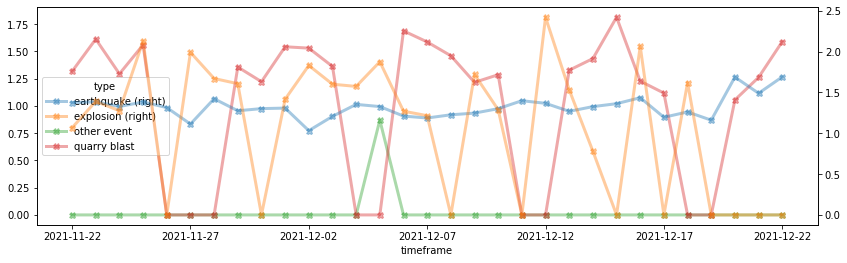

In [30]:
sec_y = ["earthquake", "explosion"]

q.plot(
    secondary_y=sec_y,
    mark_right=True,
    lw=3,
    marker="X",
    markersize=6,
    alpha=0.4,
    figsize=(14,4)
);

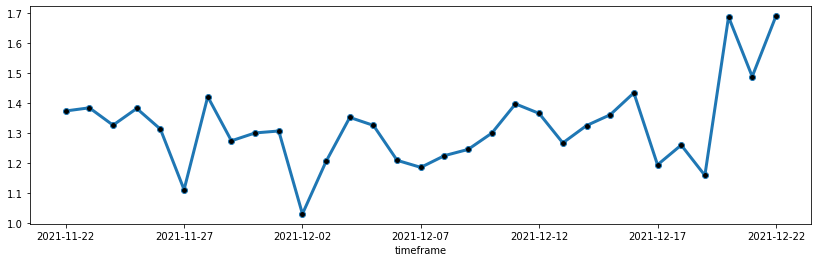

In [31]:
q['earthquake'].plot(lw=3, marker="o", markerfacecolor="k", figsize=(14,4));

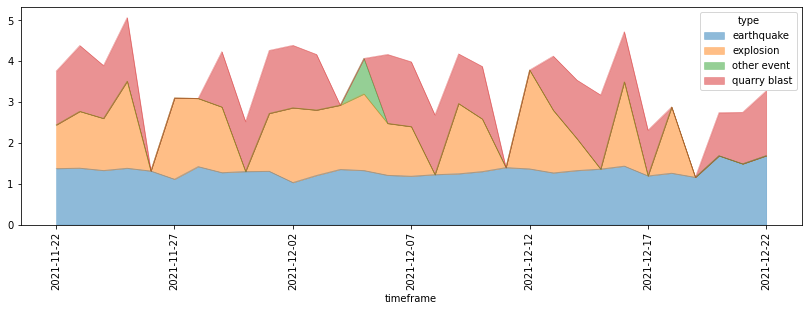

In [32]:
q.plot.area(alpha=0.5, rot=90, lw=0.5, figsize=(14,4));

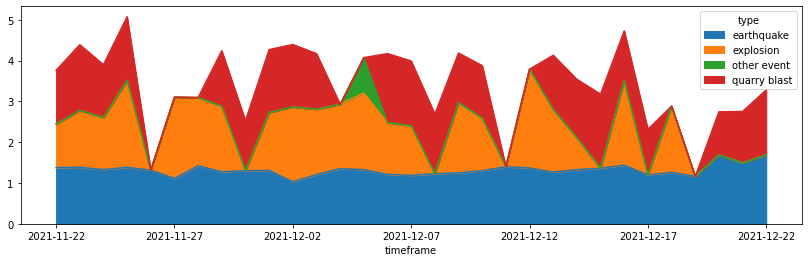

In [33]:
q.plot.area(stacked=True, figsize=(14,4));

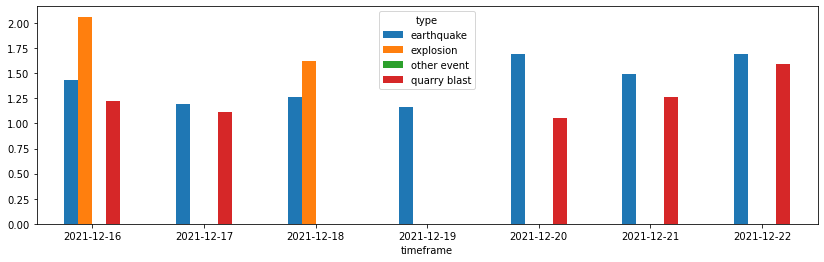

In [34]:
q.tail(7).plot.bar(stacked=False, rot=0, figsize=(14,4));

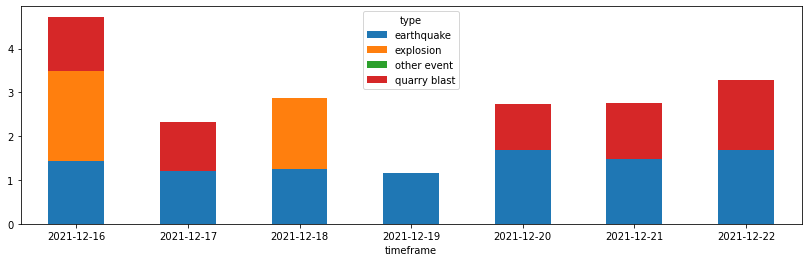

In [35]:
q.tail(7).plot.bar(stacked=True, rot=0, figsize=(14,4));